In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('data/car_evaluation.csv', header=None)

## EDA

In [3]:
#Visualizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
df_car.shape

(1728, 7)

In [5]:
#renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [6]:
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:
# Tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
# Nuemero de apariciones de las diferentes clases
df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
# verificar los valores nulos por columna 
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [10]:
# separar x e y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [11]:
# Importar las librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# 30% para el test y 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [13]:
y_train.shape, y_test.shape

((1209,), (519,))

## Entrenamiento de modelos de clasificación

In [14]:
df_car.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [15]:
# Transformación de los datos
import category_encoders as ce

enconder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train  = enconder.fit_transform(X_train)
X_test  = enconder.transform(X_test)

In [16]:
# Verificar la transformación
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [17]:
# Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [18]:
# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [19]:
# Calculo de las predicciones en train y test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

## Evualuación

## Matriz de confusión
+ Permite visualizar el desempeño de un algoritmo de apredizaje supervisado.
+ Cada columna representa el número de predicciones de cada clase.
+ Cada fila representa a las intancias en la clase real.

![matriz_confusion](./img/matriz_confusion.png)

+ **Verdadera Positivo (TP)**: Predije que era positivo y lo era. 
+ **Verdadera Negativo (TN)**: Predije que era falso y lo era. 
+ **Falso Positivo (FP)**: Predije que era positivo, pero resulto siendo negativo. 
+ **Falso Negativo (FN)**: Predije que era negativo, pero resulto siendo positivo. 

**Verdaderos positivos** como **negativos** son **aciertos**.
**Falsos negativos** como **positivos** son **errores**.

### Exactitud o accuracy
+ Cercanía al resultado de una medición del valor verdadero.
+ En terminos estadísticos, la exactitud está relacionada con el sesgo de una estimación.
+ Porporción entre los positivos reales predichos y todos los casos positivos.
+ En forma práctica, la exactitud es el % total de elementos clasificados correctamente.

$$
 accuracy = \frac{(VP + VN)}{(VP + FP + FN + VN)} * 100
$$
+ Un valor adecuado de accuracy depende depende de la cantidad de datos y del porblema que se quiere resolver, normalmente esta entre el 80% al 90%. 

### Precisión
+ Dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.
+ Cuanto menor es la dispersión, mayor la precisión.
+ Porporción entre el número de predicciones correctas (tanto positivas como negativas) y el total de predicciones.
+ En forma práctica, es el porcentaje de casos positivos detectados.
+ Sirve para medir la calidad del modelo de machine learning en clasificación.

$$
 precision = \frac{(VP)}{(VP + FP)} * 100
$$

### Sensibilidad
+ Recall, sensitivity o tasa de verdaderos positivos.
+ Porporción de casos positivos que fueron correctamente identificados.

$$
 recall = \frac{(VP)}{(VP + FN)} * 100
$$


### Especificidad
+ Tasa de verdaderos negativos.
+ Proporción de casos negativos que fueron correctamente identificados.

$$
 sensitive = \frac{(VN)}{(VN + FP)} * 100
$$

### F1-score
+ Resumen la precisión y sensibilidad en una sola métrica.
$$
 \text{f1-score} = \frac{(precision * recall)}{(precision + recall)} * 100
$$

In [20]:
# Calculo de las metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy in train is: ',  train_accuracy)
print('El accuracy in test is: ', test_accuracy)

El accuracy in train is:  0.7733664185277088
El accuracy in test is:  0.7591522157996147


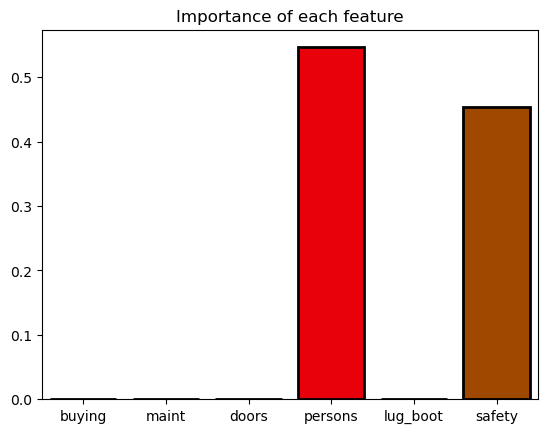

In [21]:
# Verificar el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importance of each feature')
plt.show()